# Context

The aim of Principal Component Analysis (PCA) is to reduce the dimensionality of the dataset while retaining as much information as possible. This is achieved by transforming the original data into a new set of uncorrelated variables, known as principal components, which are ordered by the amount of variance they explain in the data.

In this script, I'm utilizing Principal Component Analysis (PCA) to reduce the dimensionality of my facial recognition image dataset. I begin by loading my previously processed dataset, separating it into features (X) and labels (y).

My goal is to transform my original image data into a set of uncorrelated variables, termed as eigen images, which capture most of the variance in the data. To achieve this, I first normalize my data by subtracting the mean.

I then apply PCA to my normalized data without reducing the dimensionality initially. This allows me to compute the explained variance ratio for each principal component. I visualize this data to decide how many principal components to retain.

Using the elbow method, I observe that 50 components capture over 80% of the variance. This is a good balance between maintaining significant information and reducing complexity.

After reducing the dimensionality to 50 components, I save my PCA model and inverse transform the reduced data back into the original space. This allows me to visualize the effect of PCA on individual images, helping me understand how the dimensionality reduction impacts the data.

For visual clarity, I also define a function to convert the binary gender labels back into human-readable form. I then randomly select a set of images, visualize them with their original labels, and compare them with their corresponding inverse-transformed images.

Finally, I save the PCA-reduced data, labels, and mean of original data into a numpy zip file for further processing.


In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from glob import glob

In [19]:
# Load numpy zip data
data = np.load(r'W:\MayCooperStation\New Documents\Data Science and ML\FacialRecognition\data\data_10000_norm.npz')

In [20]:
# Separate the features and labels
X  = data['arr_0']  # independent features (image data)
y = data['arr_1']  # target value (classification labels)
X.shape, y.shape

((5460, 10000), (5460,))

# Eigen Image

Eigen images are a set of basis images used to represent or reconstruct a set of original images. They are derived using Principal Component Analysis (PCA), a statistical method that reduces the dimensionality of data while preserving as much variance as possible.

In [21]:
# Normalize the data by subtracting the mean
X1 = X - X.mean(axis=0)

In [22]:
# Apply PCA without reducing the dimensionality
from sklearn.decomposition import PCA
pca = PCA(n_components=None,whiten=True,svd_solver='auto')
x_pca = pca.fit_transform(X1)
x_pca.shape

(5460, 5460)

In [23]:
# Compute the explained variance ratio for each principal component
eigen_ratio = pca.explained_variance_ratio_
eigen_ratio_cum = np.cumsum(eigen_ratio)

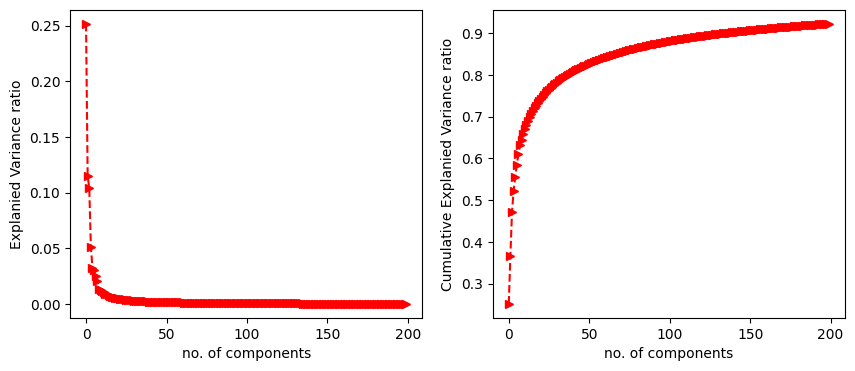

In [24]:
# Plot the explained variance and cumulative variance
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200],'r>--')
plt.xlabel('no. of components')
plt.ylabel('Explanied Variance ratio')
plt.subplot(1,2,2)
plt.xlabel('no. of components')
plt.ylabel('Cumulative Explanied Variance ratio')
plt.plot(eigen_ratio_cum[:200],'r>--')
plt.show()

### Further Context

By utilizing the elbow method, we consider the optimal number of components to be between 25 to 30. This is because, when we consider components in this range, the explained variance is approximately 75%. However, in order to achieve a minimum of 80% variance, we are opting to consider 50 components.

The choice of how many principal components to keep (and hence, how much variance to retain) is a trade-off. Keeping more components will retain more information, but it will also make the model more complex and potentially harder to interpret.

In many contexts, retaining 80-90% of the variance is often chosen as a good balance between retaining information and simplifying the model. This is not a strict rule and the specific threshold should depend on the specific application and the amount of noise in the data.

For example, if the data is very noisy, it might be beneficial to keep fewer components (and hence less than 80% of the variance) to avoid overfitting to the noise. On the other hand, if the signal-to-noise ratio is high, it might be possible to keep more components (and hence more than 80% of the variance) without overfitting.

In my case, the decision to retain 80% of the variance is likely based on similar considerations. By keeping 50 principal components, you are simplifying the dataset while still retaining the majority of the useful information.

In [25]:
# Reduce dimensionality to 50 components, which explains more than 80% of variance
pca_50 = PCA(n_components=50,whiten=True,svd_solver='auto')
x_pca_50 = pca_50.fit_transform(X1)
x_pca_50.shape

(5460, 50)

In [26]:
# Save the PCA model
import pickle
pickle.dump(pca_50,open(r"W:\MayCooperStation\New Documents\Data Science and ML\FacialRecognition\data\model\pca_50.pickle",'wb'))

In [27]:
# Inverse transform the reduced data back to original space
x_pca_inv = pca_50.inverse_transform(x_pca_50)
x_pca_inv.shape

(5460, 10000)

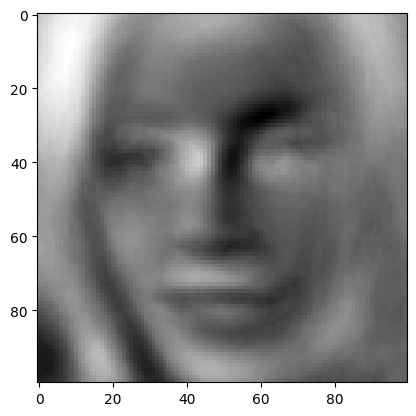

In [28]:
# Visualize one of the inverse-transformed images
eig_img = x_pca_inv[0,:]
eig_img = eig_img.reshape((100,100))
plt.imshow(eig_img,cmap='gray')

In [29]:
# Define a function to convert the binary gender labels into human-readable form
def label(y):
    if y==0:
        return 'Male'
    else:
        return 'Female'

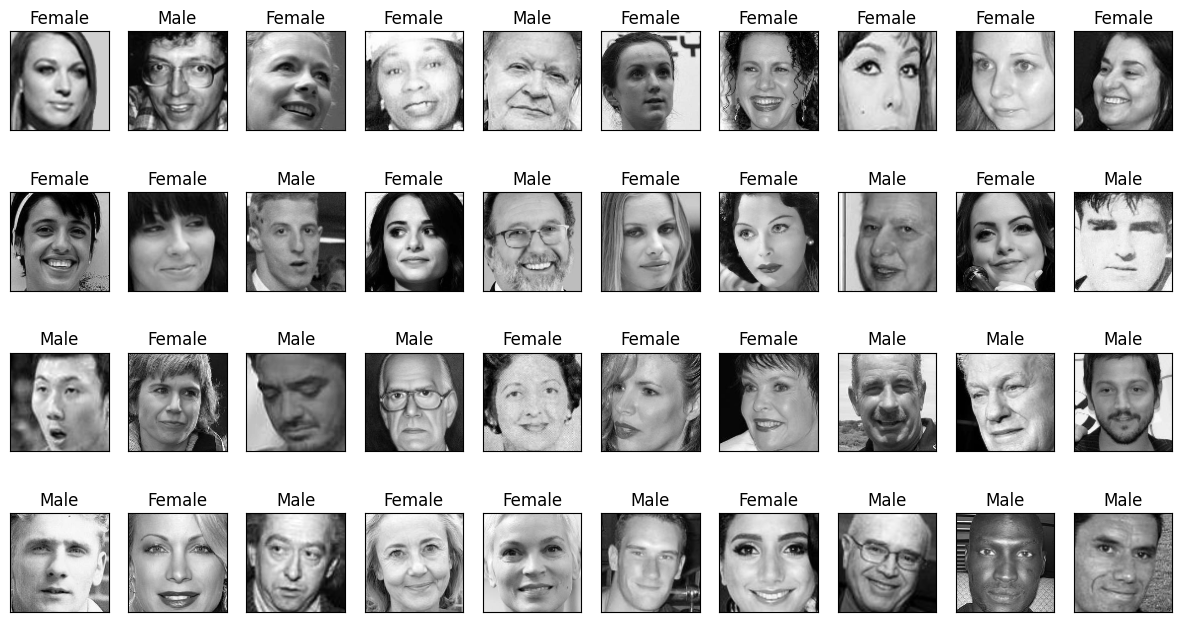

In [30]:
# Randomly select some images and visualize them with their labels
pics = np.random.randint(0,5451,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
plt.show()

====================Eigen Images====================


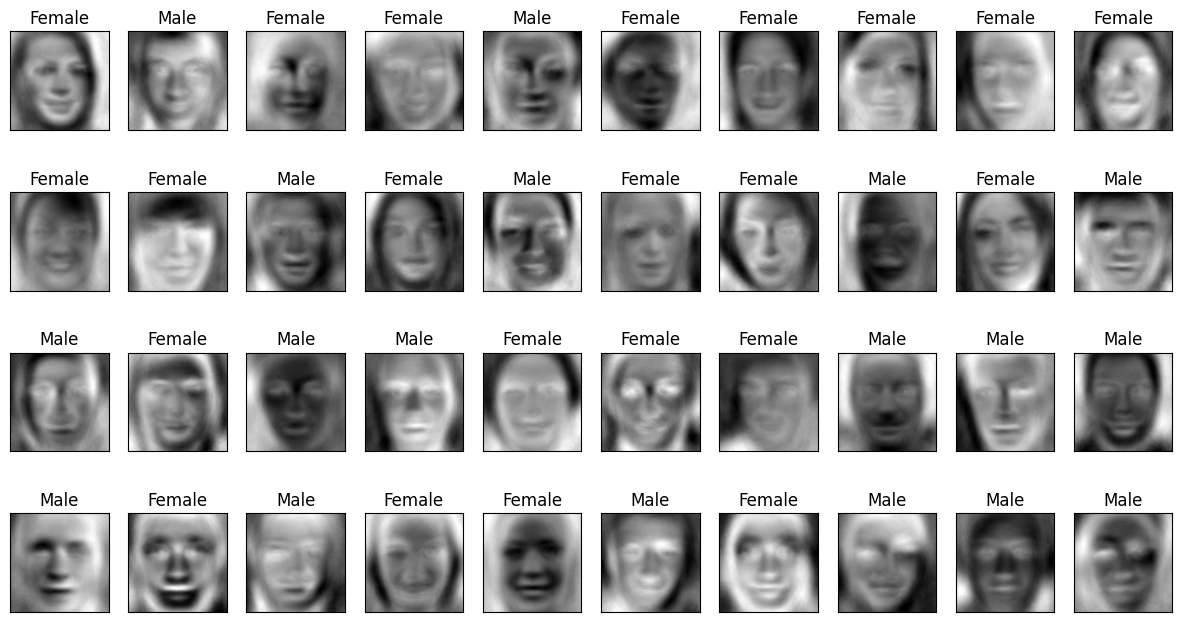

In [31]:
# Visualize the corresponding inverse-transformed images
print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = x_pca_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [32]:
# saving 
np.savez(r'W:\MayCooperStation\New Documents\Data Science and ML\FacialRecognition\data\data_pca_50_y_mean.pickle',x_pca_50,y,X.mean(axis=0))